## Narupa Rangga Goroguta
## 2209106004
## POSTTEST 7
### https://www.kaggle.com/datasets/trolukovich/food11-image-dataset

#### dataset langsung di dowbload dari kaggle

In [1]:
!pip install -q Kaggle

In [2]:
from google.colab import files
uploades=files.upload()

Saving kaggle.json to kaggle.json


In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d trolukovich/food11-image-dataset

100% 1.08G/1.08G [00:11<00:00, 108MB/s] 
100% 1.08G/1.08G [00:11<00:00, 103MB/s]


unzip file data set

In [5]:
!unzip 'food11-image-dataset.zip'

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: training/Soup/223.jpg   
  inflating: training/Soup/224.jpg   
  inflating: training/Soup/225.jpg   
  inflating: training/Soup/226.jpg   
  inflating: training/Soup/227.jpg   
  inflating: training/Soup/228.jpg   
  inflating: training/Soup/229.jpg   
  inflating: training/Soup/23.jpg    
  inflating: training/Soup/230.jpg   
  inflating: training/Soup/231.jpg   
  inflating: training/Soup/232.jpg   
  inflating: training/Soup/233.jpg   
  inflating: training/Soup/234.jpg   
  inflating: training/Soup/235.jpg   
  inflating: training/Soup/236.jpg   
  inflating: training/Soup/237.jpg   
  inflating: training/Soup/238.jpg   
  inflating: training/Soup/239.jpg   
  inflating: training/Soup/24.jpg    
  inflating: training/Soup/240.jpg   
  inflating: training/Soup/241.jpg   
  inflating: training/Soup/242.jpg   
  inflating: training/Soup/243.jpg   
  inflating: training/Soup/244.jpg   
  inflating: training/Soup/24

Data Preparation

karena data sudah di train dan val
makan kita kan melalkukan image augmentation

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train_datakb = ImageDataGenerator(
                rescale=1/255,
                width_shift_range=0.2,
                horizontal_flip=True,
                brightness_range=(0.3, 0.9),
                height_shift_range=0.2,
                zoom_range=0.2)


valtest_datakb = ImageDataGenerator(
                rescale=1/255)



In [19]:
train_generator = train_datakb.flow_from_directory(
   '/content/training',
   target_size=(224, 224),
   batch_size=128,
   class_mode='categorical'
)


val_generator = valtest_datakb.flow_from_directory(
     '/content/validation',
     target_size=(224, 224),
     batch_size=128,
     class_mode='categorical'
)


test_generator = valtest_datakb.flow_from_directory(
    '/content/validation',
    target_size=(224, 224),
    batch_size=128,
    class_mode='categorical'

)


Found 9866 images belonging to 11 classes.
Found 3430 images belonging to 11 classes.
Found 3430 images belonging to 11 classes.


import kan library

In [20]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

menggunakan model sequential 12 layer

In [21]:
model = Sequential([

    Conv2D(64, (5, 5), activation='relu', padding='valid', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),

     Conv2D(128, (5, 5), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(512, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(11, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 220, 220, 64)      4864      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 110, 110, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 106, 106, 128)     204928    
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 53, 53, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 51, 51, 256)       295168    
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 25, 25, 256)      

In [22]:
from keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights = True)

In [23]:

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [24]:

fitmodel = model.fit(train_generator,
            validation_data = val_generator,
            epochs=15,
            verbose = 1,
            callbacks=[callback])

Epoch 1/15
78/78 [==============================] - 207s 2s/step - loss: 2.3161 - accuracy: 0.1609 - val_loss: 2.2820 - val_accuracy: 0.1676
Epoch 2/15
78/78 [==============================] - 190s 2s/step - loss: 2.2091 - accuracy: 0.2112 - val_loss: 2.1861 - val_accuracy: 0.2405
Epoch 3/15
78/78 [==============================] - 192s 2s/step - loss: 2.1112 - accuracy: 0.2428 - val_loss: 1.9906 - val_accuracy: 0.2977
Epoch 4/15
78/78 [==============================] - 190s 2s/step - loss: 2.0129 - accuracy: 0.2879 - val_loss: 1.9433 - val_accuracy: 0.3216
Epoch 5/15
78/78 [==============================] - 187s 2s/step - loss: 1.9459 - accuracy: 0.3096 - val_loss: 1.9559 - val_accuracy: 0.3324
Epoch 6/15
78/78 [==============================] - 187s 2s/step - loss: 1.8825 - accuracy: 0.3395 - val_loss: 1.8758 - val_accuracy: 0.3741
Epoch 7/15
78/78 [==============================] - 190s 2s/step - loss: 1.8108 - accuracy: 0.3663 - val_loss: 1.7256 - val_accuracy: 0.3997
Epoch 8/15
78

In [27]:
model.evaluate(test_generator)

27/27 [==============================] - 15s 554ms/step - loss: 1.3393 - accuracy: 0.5534


[1.339314579963684, 0.5533527731895447]

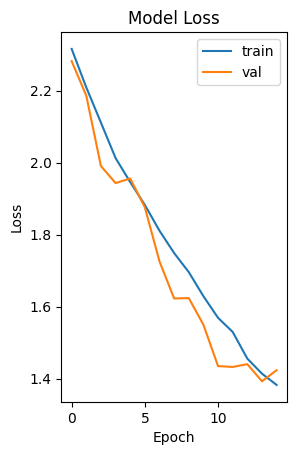

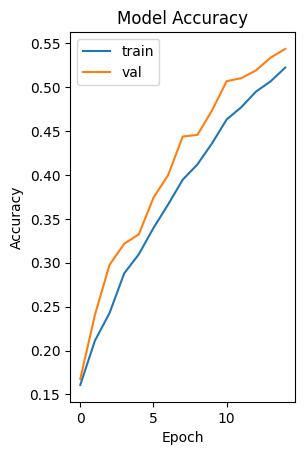

In [33]:
import matplotlib.pyplot as plt

plt.subplot(1,2,1)
plt.plot(fitmodel.history['loss'], label='train')
plt.plot(fitmodel.history['val_loss'], label='val')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.show()

plt.subplot(1,2,2)
plt.plot(fitmodel.history['accuracy'], label='train')
plt.plot(fitmodel.history['val_accuracy'], label='val')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()
